In [1]:
#getting and working with data
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
from sklearn.metrics.cluster import silhouette_score
import scipy.stats as stats
from sklearn.externals.six import StringIO

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import export_graphviz
from IPython.display import display
import pydotplus
from IPython.display import Image

import warnings

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
breast_cancer_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                        names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [3]:
display(breast_cancer_data.head())

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
breast_cancer_data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
breast_cancer_data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
print(breast_cancer_data.shape)

(699, 11)


In [7]:
breast_cancer_data.columns = breast_cancer_data.columns.map(lambda x: x.replace(" ","_"))

In [8]:
breast_cancer_data.columns

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
breast_cancer_data.Bare_Nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [10]:
breast_cancer_data = breast_cancer_data[breast_cancer_data.Bare_Nuclei != "?"]

In [11]:
breast_cancer_data.Bare_Nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [12]:
breast_cancer_data["Bare_Nuclei"] = breast_cancer_data["Bare_Nuclei"].astype('str').astype('int')

In [13]:
breast_cancer_data.dtypes

Sample_code_number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
breast_cancer_data.shape

(683, 11)

In [15]:
columns_titles = breast_cancer_data.columns

In [16]:
columns_titles

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [17]:
for column in columns_titles:
    print(breast_cancer_data[column].value_counts())

1182404    6
1276091    5
1198641    3
704097     2
1321942    2
695091     2
1017023    2
385103     2
1070935    2
1240603    2
1277792    2
654546     2
560680     2
1174057    2
822829     2
897471     2
466906     2
1115293    2
1339781    2
1114570    2
734111     2
411453     2
1158247    2
1354840    2
1061990    2
769612     2
1293439    2
1116116    2
1168736    2
1105524    2
          ..
1096352    1
1171845    1
255644     1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
709287     1
1201834    1
1201870    1
1125035    1
888523     1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample_code_number, dtype: int64
1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump_Thickness, dtype: int64
1     373
10     67
3      52
2 

In [18]:
display(breast_cancer_data['Class'][:10])
display(breast_cancer_data.Class.value_counts())

0    2
1    2
2    2
3    2
4    2
5    4
6    2
7    2
8    2
9    2
Name: Class, dtype: int64

2    444
4    239
Name: Class, dtype: int64

In [19]:
breast_cancer_data.Class = breast_cancer_data.Class.replace(2,0)
breast_cancer_data.Class = breast_cancer_data.Class.replace(4,1)
display(breast_cancer_data['Class'].value_counts())

0    444
1    239
Name: Class, dtype: int64

In [20]:
for column in columns_titles:
    print(column, "\n", breast_cancer_data[column].nunique())

Sample_code_number 
 630
Clump_Thickness 
 10
Uniformity_of_Cell_Size 
 10
Uniformity_of_Cell_Shape 
 10
Marginal_Adhesion 
 10
Single_Epithelial_Cell_Size 
 10
Bare_Nuclei 
 10
Bland_Chromatin 
 10
Normal_Nucleoli 
 10
Mitoses 
 9
Class 
 2


In [21]:
breast_cancer_data_no_id = breast_cancer_data.drop("Sample_code_number", axis=1)

In [22]:
display(breast_cancer_data_no_id.head())

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [23]:
breast_cancer_data_features = breast_cancer_data_no_id.columns

# Logistic Regression

In [24]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
X = breast_cancer_data_no_id[feature_cols]
y = breast_cancer_data_no_id.Class
logreg.fit(X,y)
outcome_pred_class_log = logreg.predict(X)

In [25]:
outcome_pred_class_log

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1,

In [26]:
list(zip(feature_cols, logreg.coef_[0]))

[('Clump_Thickness', 0.53500127397774877),
 ('Uniformity_of_Cell_Size', -0.0062973262708835402),
 ('Uniformity_of_Cell_Shape', 0.32272343739828652),
 ('Marginal_Adhesion', 0.33063150207736303),
 ('Single_Epithelial_Cell_Size', 0.096631839452400059),
 ('Bare_Nuclei', 0.38302185332833028),
 ('Bland_Chromatin', 0.44717374386751196),
 ('Normal_Nucleoli', 0.21302828175841648),
 ('Mitoses', 0.53483576222885543)]

In [27]:
y = breast_cancer_data_no_id.Class
y_pred = outcome_pred_class_log
print("Model accuracy: ", metrics.accuracy_score(y, y_pred))

Model accuracy:  0.96925329429


In [28]:
breast_cancer_data_no_id.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [29]:
breast_cancer_data_no_id.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


# Training and Testing

In [30]:
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X, y, test_size=0.3, random_state=1)
print( "training data size:",X_mult_train.shape)
print( "testing data size:",X_mult_test.shape)

training data size: (478, 9)
testing data size: (205, 9)


In [31]:
X_mult_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
631,5,1,1,1,2,1,2,1,1
633,8,7,4,4,5,3,5,10,1
203,5,1,1,1,2,1,3,1,1
42,6,10,10,2,8,10,7,3,3
571,7,6,10,5,3,10,9,10,2


In [32]:
#train on training set
mult_logreg2 = LogisticRegression(C=1e9)
mult_logreg2.fit(X_mult_train, y_mult_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [33]:
#generate predictions on training set and evaluate
y_mult_pred_train = mult_logreg2.predict(X_mult_train)
print("Training model accuracy: ", metrics.accuracy_score(y_mult_train, y_mult_pred_train))
print("Classification Report:\n", metrics.classification_report(y_mult_train,y_mult_pred_train))

Training model accuracy:  0.97489539749
Classification Report:
              precision    recall  f1-score   support

          0       0.98      0.98      0.98       311
          1       0.97      0.96      0.96       167

avg / total       0.97      0.97      0.97       478



In [34]:
#generate predictions on test set and evaluate
y_mult_pred_test = mult_logreg2.predict(X_mult_test)
print("Training model accuracy: ", metrics.accuracy_score(y_mult_test, y_mult_pred_test))
print("Classification Report:\n", metrics.classification_report(y_mult_test,y_mult_pred_test))

Training model accuracy:  0.960975609756
Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.97      0.97       133
          1       0.94      0.94      0.94        72

avg / total       0.96      0.96      0.96       205



# Decision Tree Regressor

In [36]:
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_mult_train,y_mult_train)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_mult_test,decision_tree.predict(X_mult_test))))

Decision Tree RMSE: 0.202675179431


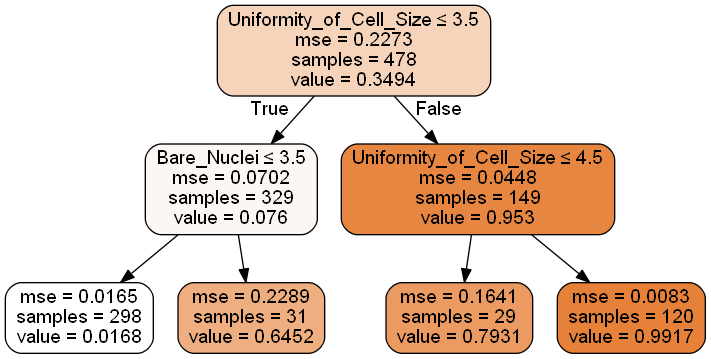

In [37]:
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_mult_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [38]:
X_mult_train.columns.tolist()

['Clump_Thickness',
 'Uniformity_of_Cell_Size',
 'Uniformity_of_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [39]:
pd.DataFrame({'feature':X_mult_train.columns.tolist() , 'importance':decision_tree.feature_importances_})

,feature,importance
0,Clump_Thickness,0.000000
1,Uniformity_of_Cell_Size,0.878015
2,Uniformity_of_Cell_Shape,0.000000
3,Marginal_Adhesion,0.000000
4,Single_Epithelial_Cell_Size,0.000000
5,Bare_Nuclei,0.121985
6,Bland_Chromatin,0.000000
7,Normal_Nucleoli,0.000000
8,Mitoses,0.000000


In [40]:
breast_tree_class = DecisionTreeClassifier(max_depth=4, random_state=1)
breast_tree_class.fit(X_mult_train, y_mult_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

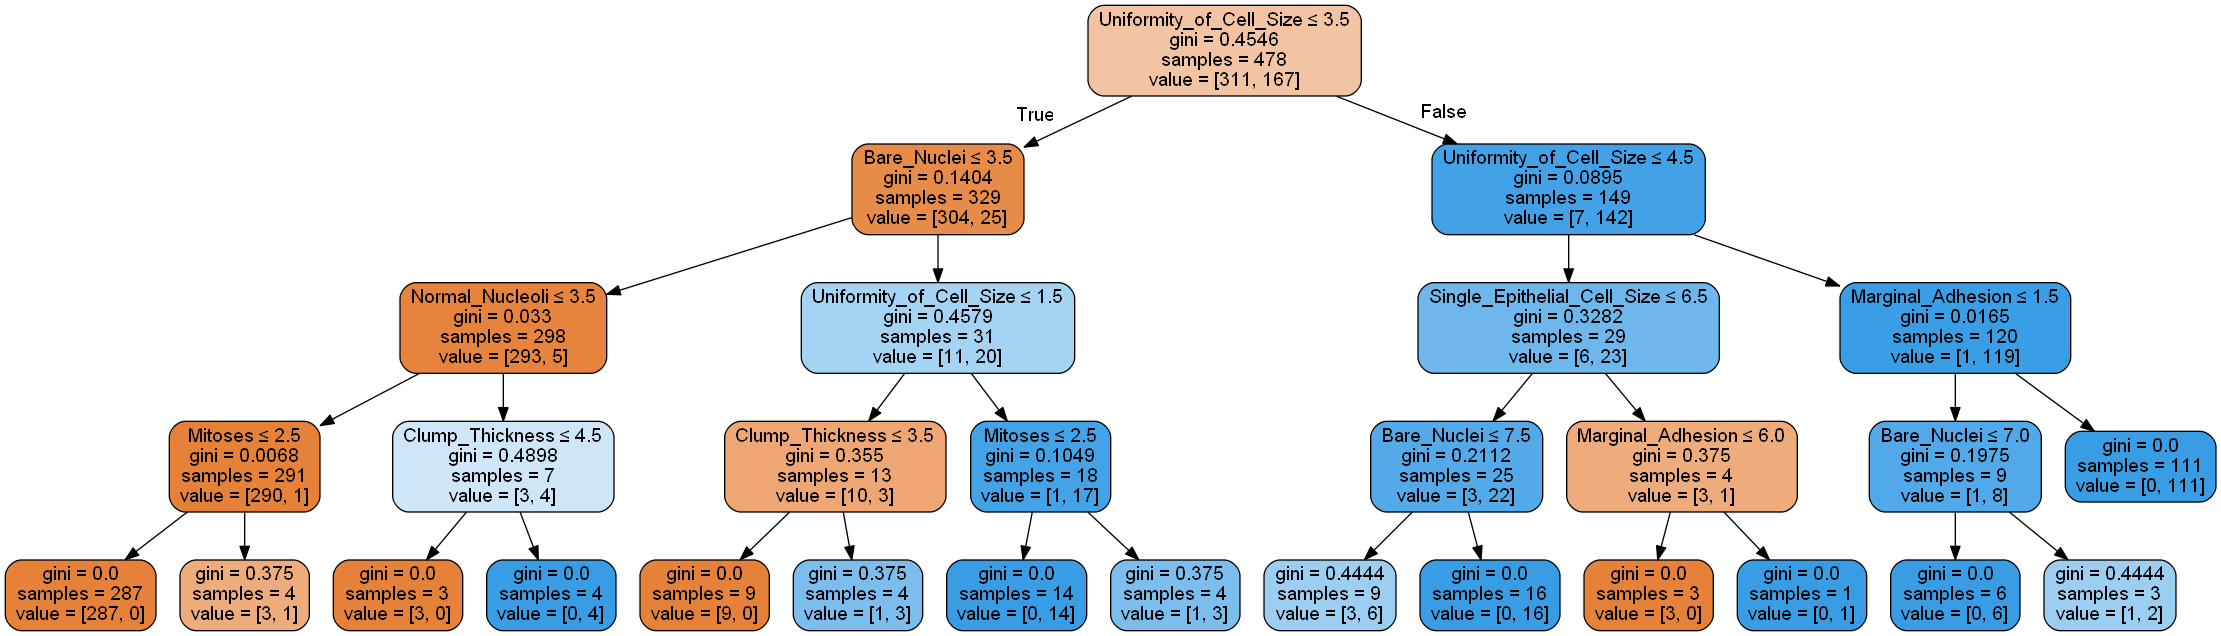

In [41]:
dot_data_breast = StringIO()  
export_graphviz(breast_tree_class, out_file=dot_data_breast,  
                    feature_names=X_mult_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
occ_graph = pydotplus.graph_from_dot_data(dot_data_breast.getvalue())  
Image(occ_graph.create_png())

In [42]:
print(accuracy_score(y_mult_test,breast_tree_class.predict(X_mult_test)))

0.960975609756


In [43]:
pd.DataFrame({'feature':X_mult_train.columns.tolist(), 'importance':breast_tree_class.feature_importances_})

,feature,importance
0,Clump_Thickness,0.031541
1,Uniformity_of_Cell_Size,0.806346
2,Uniformity_of_Cell_Shape,0.000000
3,Marginal_Adhesion,0.008220
4,Single_Epithelial_Cell_Size,0.013193
5,Bare_Nuclei,0.115190
6,Bland_Chromatin,0.000000
7,Normal_Nucleoli,0.021258
8,Mitoses,0.004251
